# Worksheet 12

Name:  Jiang Cheng Liu 
UID: U77948366

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Yes
2. No
3. Yes
4. No

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

I would first clean the data to get rid of any null values or other inconsistencies. Then use a training set to tune the model and then test on the the testing set. Then with this iterative process, if the results are not satisfactory, then we can continue to fine tune it by choosing new parameters or a new algorithm. 

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

1. Underfitting is when the model is too simple to capture the underlying patterns of the data, has insufficient training, or inadequate features. Underfitting usually has high bias and low variance predictions. 
2. Overfitting is when the model is too complex and has too much training such that it factors in noise within the data. Overfitting usually has low bias and high variance predictions. 

### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

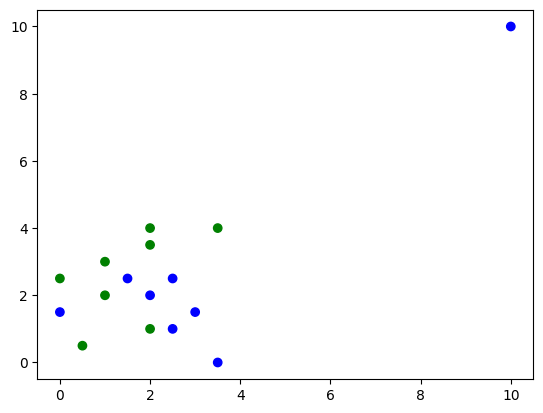

In [2]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

Point (10,10) is an outlier. 

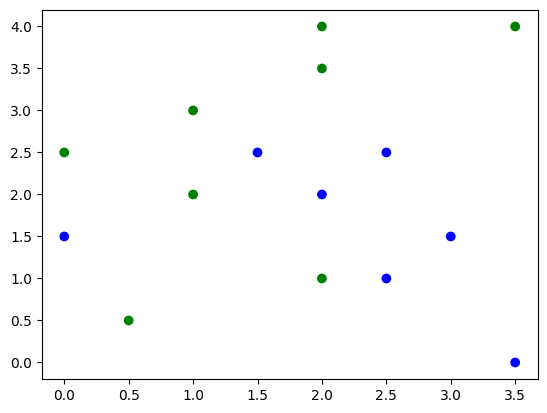

In [3]:
new_data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}

colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(new_data["Attribute A"], new_data["Attribute B"], color=colors[new_data["Class"]].tolist())
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

No

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

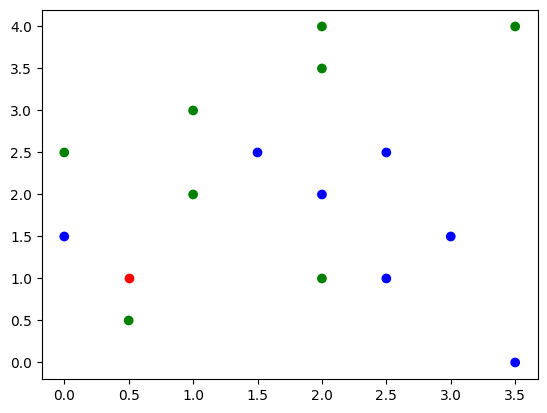

In [4]:
data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}

colors = np.array([x for x in 'bgrcmyk'])
new_point = [0.5, 1]
plt.scatter(new_point[0], new_point[1], color='red')
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

[(2, 2, 0), (1.5, 2.5, 0), (2.5, 2.5, 0)]


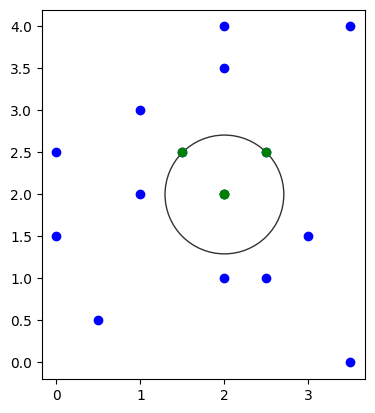

In [5]:
def n_closest_to(example):
    distances = np.sqrt((np.array(new_data["Attribute A"]) - example[0])**2 + (np.array(new_data["Attribute B"]) - example[1])**2)
    indexes = np.argsort(distances)[:3]
    point1 = (new_data["Attribute A"][indexes[0]], new_data["Attribute B"][indexes[0]], new_data["Class"][indexes[0]])
    point2 = (new_data["Attribute A"][indexes[1]], new_data["Attribute B"][indexes[1]], new_data["Class"][indexes[1]])
    point3 = (new_data["Attribute A"][indexes[2]], new_data["Attribute B"][indexes[2]], new_data["Class"][indexes[2]])
    return [point1, point2, point3]

location = (2, 2)
points = n_closest_to(location)
print(points)
radius = max(np.sqrt((location[0] - point[0])**2 + (location[1] - point[1])**2) for point in points)
_, axes = plt.subplots()
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.scatter(data["Attribute A"], data["Attribute B"], color='b')
axes.scatter(location[0], location[1], color='g')
axes.scatter([point[0] for point in points], [point[1] for point in points], color='green')
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [6]:
def majority(points):
    classes = [point[2] for point in points]
    return max(set(classes), key=classes.count)

points = n_closest_to(location)
print(majority(points))
    

0


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [7]:
count = 0
for i in range(len(new_data["Attribute A"])):
    actual_class = data["Class"][i]
    test_point = (new_data["Attribute A"][i], new_data["Attribute B"][i])
    training_set = [(data["Attribute A"][j], data["Attribute B"][j], data["Class"][j]) for j in range(len(data["Attribute A"])) if j != i]
    prediction = majority(n_closest_to(test_point))
    if prediction == actual_class:
        count += 1

print("overall accuracy = " + str(count/len(new_data["Attribute A"]) * 100) + "%")

overall accuracy = 80.0%


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import ssl
import numpy as np

ssl._create_default_https_context = ssl._create_stdlib_context

mnist = fetch_openml('mnist_784', version=1)
#sample of mnist data 
sample_size = 5000
indices = np.random.choice(mnist.data.shape[0], sample_size, replace=False)
data = mnist.data.iloc[indices]
target = mnist.target.iloc[indices]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

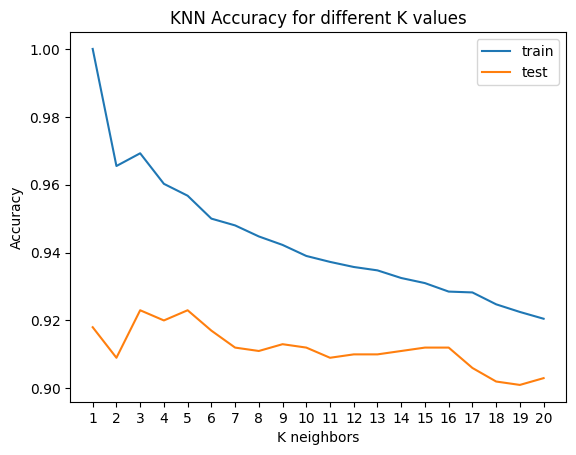

In [39]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

train_accuracy = []
test_accuracy = []

for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(range(1,21), train_accuracy, label="train")
plt.plot(range(1,21), test_accuracy, label="test")
plt.xlabel("K neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks(range(1,21))
plt.title("KNN Accuracy for different K values")
plt.show()


c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


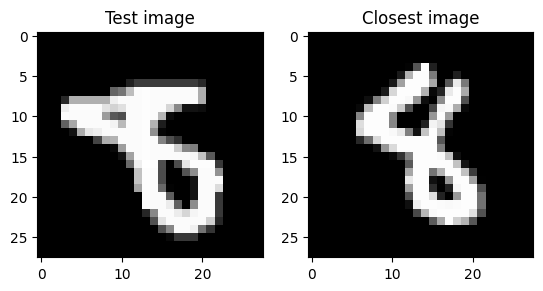

In [7]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
index = np.random.choice(X_test.shape[0])
image = X_test.iloc[index].values.reshape(28,28)
distances, indices = knn.kneighbors([X_test.iloc[index]])
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Test image")

for i, idx in enumerate(indices[0]):
    if i == 0:
        plt.subplot(1, 2, i+2)
        plt.imshow(X_train.iloc[idx].values.reshape(28,28), cmap='gray')
        plt.title("Closest image")
        plt.show()


d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

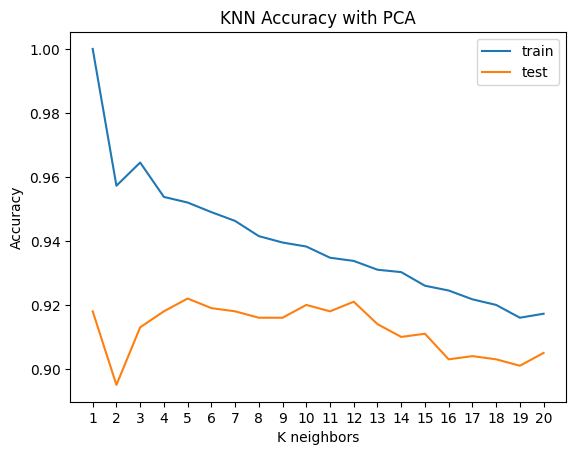

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

train_accuracy = []
test_accuracy = []

dimensionality_reduction = PCA(n_components=300)  
knn_model = KNeighborsClassifier(n_neighbors=5)  

model = make_pipeline(dimensionality_reduction, knn_model)
model.fit(X_train, y_train)

test_accuracy_pca = []
train_accuracy_pca = []

for k in range(1, 21):
    knn_model.set_params(n_neighbors=k)
    model.fit(X_train, y_train)
    train_accuracy_pca.append(model.score(X_train, y_train))
    test_accuracy_pca.append(model.score(X_test, y_test))

plt.plot(range(1, 21), train_accuracy_pca, label="train")
plt.plot(range(1, 21), test_accuracy_pca, label="test")
plt.xlabel("K neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks(range(1, 21))
plt.title("KNN Accuracy with PCA")
plt.show()




    


For the testing accuracy for the pca reduction, the general pattern stays the same with the previous, however, the change in accuracy was more smooth in the previous. The most accurate k is at 12 instead of 5 in the pca version. I chose to retain 300 components because mnist data has 784 components, and i wanted to retain as much information while also lowering the dimensionality of the dataset. At k = 2 both models are underfitting while in the others the decrease in accuracy from the training set was miniscule. 

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

train_data = pd.read_csv("train.csv")

survived = train_data["Survived"]
train_data["Family_Size"] = train_data["SibSp"] + train_data["Parch"] + 1
train_data["Ticket_Prefix"] = train_data["Ticket"].apply(lambda x: x.split(" ")[0] if len(x.split(" ")) > 1 else "None")
train_data["Title"] = train_data["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
train_data["Age"].fillna(train_data["Age"].mean(), inplace=True)
train_data["Fare"].fillna(train_data["Fare"].mean(), inplace=True)
train_data = train_data.drop(["Survived", "Cabin", "Embarked", "PassengerId", "Name", "Parch", "SibSp", "Ticket"], axis=1)
features = ["Pclass", "Sex", "Age", "Family_Size", "Fare", "Title", "Ticket_Prefix"]


#encode non-numeric data to numeric
for feature in features:
    if train_data[feature].dtype == "object":
        le = LabelEncoder()
        train_data[feature] = le.fit_transform(train_data[feature])


print(train_data.columns)
print(len(train_data.columns))

X_train, X_test, y_train, y_test = train_test_split(train_data, survived, test_size=0.2, random_state=42)

best_k = 0
best_accuracy = 0

for k in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
print("Best K: " + str(best_k))
print("Best Accuracy: " + str(best_accuracy))


test_data = pd.read_csv("test.csv")
passenger_ids = test_data["PassengerId"]
test_data["Family_Size"] = test_data["SibSp"] + test_data["Parch"] + 1
test_data["Ticket_Prefix"] = test_data["Ticket"].apply(lambda x: x.split(" ")[0] if len(x.split(" ")) > 1 else "None")
test_data["Title"] = test_data["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
test_data["Age"].fillna(test_data["Age"].mean(), inplace=True)
test_data["Fare"].fillna(test_data["Fare"].mean(), inplace=True)
test_data = test_data.drop(["Cabin", "PassengerId", "Name", "Parch", "SibSp", "Ticket", "Embarked"], axis=1)

for feature in features:
    if test_data[feature].dtype == "object":
        le = LabelEncoder()
        test_data[feature] = le.fit_transform(test_data[feature])


final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
predictions = final_knn.predict(test_data)
submission = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': predictions})
submission.to_csv("submission.csv", index=False)

sub = pd.read_csv("submission.csv")
sub.shape



Index(['Pclass', 'Sex', 'Age', 'Fare', 'Family_Size', 'Ticket_Prefix',
       'Title'],
      dtype='object')
7
Best K: 9
Best Accuracy: 0.7541899441340782


(418, 2)

I chose to incorporate Family_Size because the surivival rates may be impacted depending how much people one would need to care for in a group, and then Ticket_Prefix is the other one to see if there are specific tickets that impacted where one is placed in the ship which may have different survival rates. I also added Title to further enhance the model to see if the title relating to age group would reflect the survival rate better. My k is 9 since it produced the highest accurracy from 1 to 50. 

Link to Profile: https://www.kaggle.com/jiangchengliu
- It shows my submission on March 17th, 2024